In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
loan_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/loan_analysis_summary.csv')

In [0]:
loan_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


In [0]:
loan_df[['fico_score', 'loan_total']].corr('spearman')

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


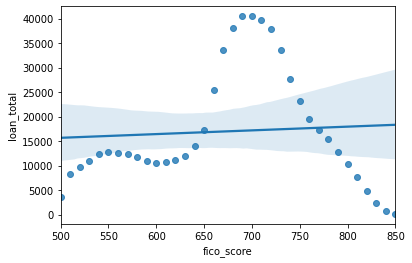

In [0]:
sns.regplot(x='fico_score', y='loan_total', data=loan_df)

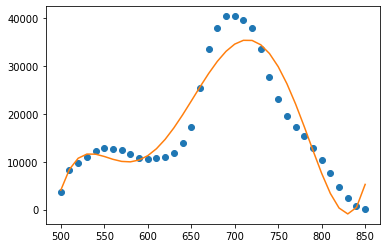

In [0]:
coeff = np.poly1d(np.polyfit(loan_df['fico_score'], loan_df['loan_total'], 5))
t = loan_df['fico_score']
plt.plot(loan_df['fico_score'], loan_df['loan_total'], 'o', t, coeff(t), '-')
plt.show()

In [0]:
coeff

poly1d([ 6.00037793e-07, -1.99259784e-03,  2.61951319e+00, -1.70446336e+03,
        5.49180402e+05, -7.01232540e+07])

In [0]:
loan_df[['dti', 'loan_total']].corr('spearman')

,dti,loan_total
dti,1.000000,0.029344
loan_total,0.029344,1.000000


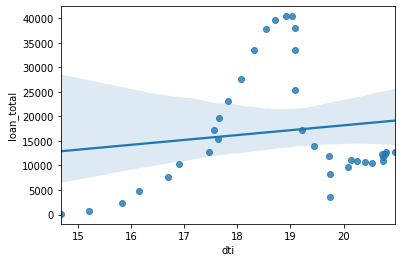

In [0]:
sns.regplot(x='dti', y='loan_total', data=loan_df)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [0]:
polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(loan_df[['dti']])

In [0]:
model = LinearRegression()
model.fit(x_poly, loan_df['loan_total'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(x_poly)

In [0]:
model.coef_

array([ 0.00000000e+00, -1.33678762e+07,  1.11964965e+06, -4.13729904e+04,
        5.69311839e+02])

In [0]:
model.intercept_

59406562.5868831

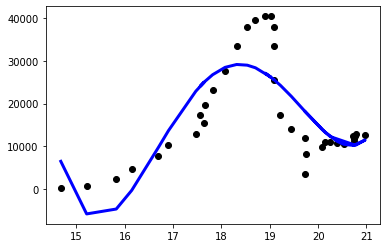

In [0]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='black')
plt.plot(loan_df['dti'], y_pred, color='blue', linewidth=3)

In [0]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

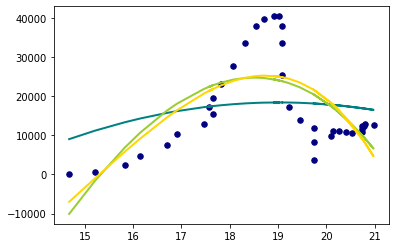

In [0]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='navy', s=30, marker='o', label='training points')

colors = ['teal', 'yellowgreen', 'gold']
lw=2

for count, degree in enumerate([2,3,4]):
  model = make_pipeline(PolynomialFeatures(degree), Ridge())
  model.fit(loan_df[['dti']], loan_df['loan_total'])
  y_plot = model.predict(loan_df[['dti']])
  plt.plot(loan_df['dti'], y_plot, color = colors[count], linewidth=lw, label = 'degree %d' %degree)